# BoomBikes - Linear Regression Assignment

Model the demand for shared bikes with the available independent variables.

| Dataset | Description | 
| --- | --- | 
| [Bike Rentals Data Set](https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv) | This contains the bike rentals made in the year 2018 and 2019. | 
| [Data Dictionary](https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view?usp=sharing) | This dataset describes the meaning of the variables mentioned in the Bike Rentals Data Set. | 

Steps we are going to follow:
1. Reading and understanding the data
2. Data preparation 
3. Training the model
4. Residual analysis 
5. Predictions and model evaluation 

## Step 0: Pre-requisites

Importing all the required libraries for Linear Regression

In [1]:
# Built-in libraries
import os
import ssl
from datetime import datetime as dt

# Third-party libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

Code to handle SSL configuration

In [2]:
if not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

### Data Dictionary

- *instant*: record index
- *dteday* : date
- *season* : season (1:spring, 2:summer, 3:fall, 4:winter)
- *yr* : year (0: 2018, 1:2019)
- *mnth* : month ( 1 to 12)
- *holiday* : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- *weekday* : day of the week
- *workingday* : if day is neither weekend nor holiday is 1, otherwise is 0.
- *weathersit* : 
    - *1*: Clear, Few clouds, Partly cloudy, Partly cloudy
    - *2*: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - *3*: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - *4*: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- *temp* : temperature in Celsius
- *atemp*: feeling temperature in Celsius
- *hum*: humidity
- *windspeed*: wind speed
- *casual*: count of casual users
- *registered*: count of registered users
- *cnt*: count of total rental bikes including both casual and registered

*Source: [UpGrad](https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view?usp=sharing)*

## Step 1: Reading and understanding the data

Create a DataFrame from the csv URL provided.

In [3]:
# dataset_url = r'https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv'
dataset_url = r'https://raw.githubusercontent.com/rahul-nanwani/boom-bikes/master/datasets/day.csv'

df = pd.read_csv(dataset_url)

Understand the dimensions, null values, and data types.

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


Create lists for continuous and categorical variables.

In [8]:
continuous_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [9]:
df[continuous_variables].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Dropping the unnecessary columns and duplicates

- Record index *instant* is of no use to us.
<!-- - Since we already have *mnth*, *yr*, and other date related columns we don't require *dteday* column. -->
- *casual* and *registered* columns aren't required as we already have *cnt* ie. the sum of both these columns and is our target variable.

In [10]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)

In [11]:
df.duplicated().sum()

0

### Mapping the categorical variables

In [12]:
df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

In [13]:
df['mnth'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)

The commonly used abbreviations for weather situation are:
1. *CLD*: Clear, Few clouds, Partly cloudy, Partly cloudy
2. *MST*: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. *LRS*: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. *HRT*: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [14]:
df['weathersit'].replace({1: 'CLD', 2: 'MST', 3: 'LRS', 4: 'HRT'}, inplace=True)

We will recreate *weekday* column using datetime module. This saves our time by avoiding to find the encoding of the weekday and also validates the date. In case a date is invalid, we would see an error.

In [15]:
df['weekday'] = df['dteday'].apply(lambda x: dt.strptime(x, '%d-%m-%Y').strftime('%a'))

In [16]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,Jan,0,Mon,0,MST,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Tue,0,MST,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Wed,1,CLD,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Thu,1,CLD,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,CLD,9.305237,11.46350,43.6957,12.522300,1600


### Visualising data

#### Continuous Variables

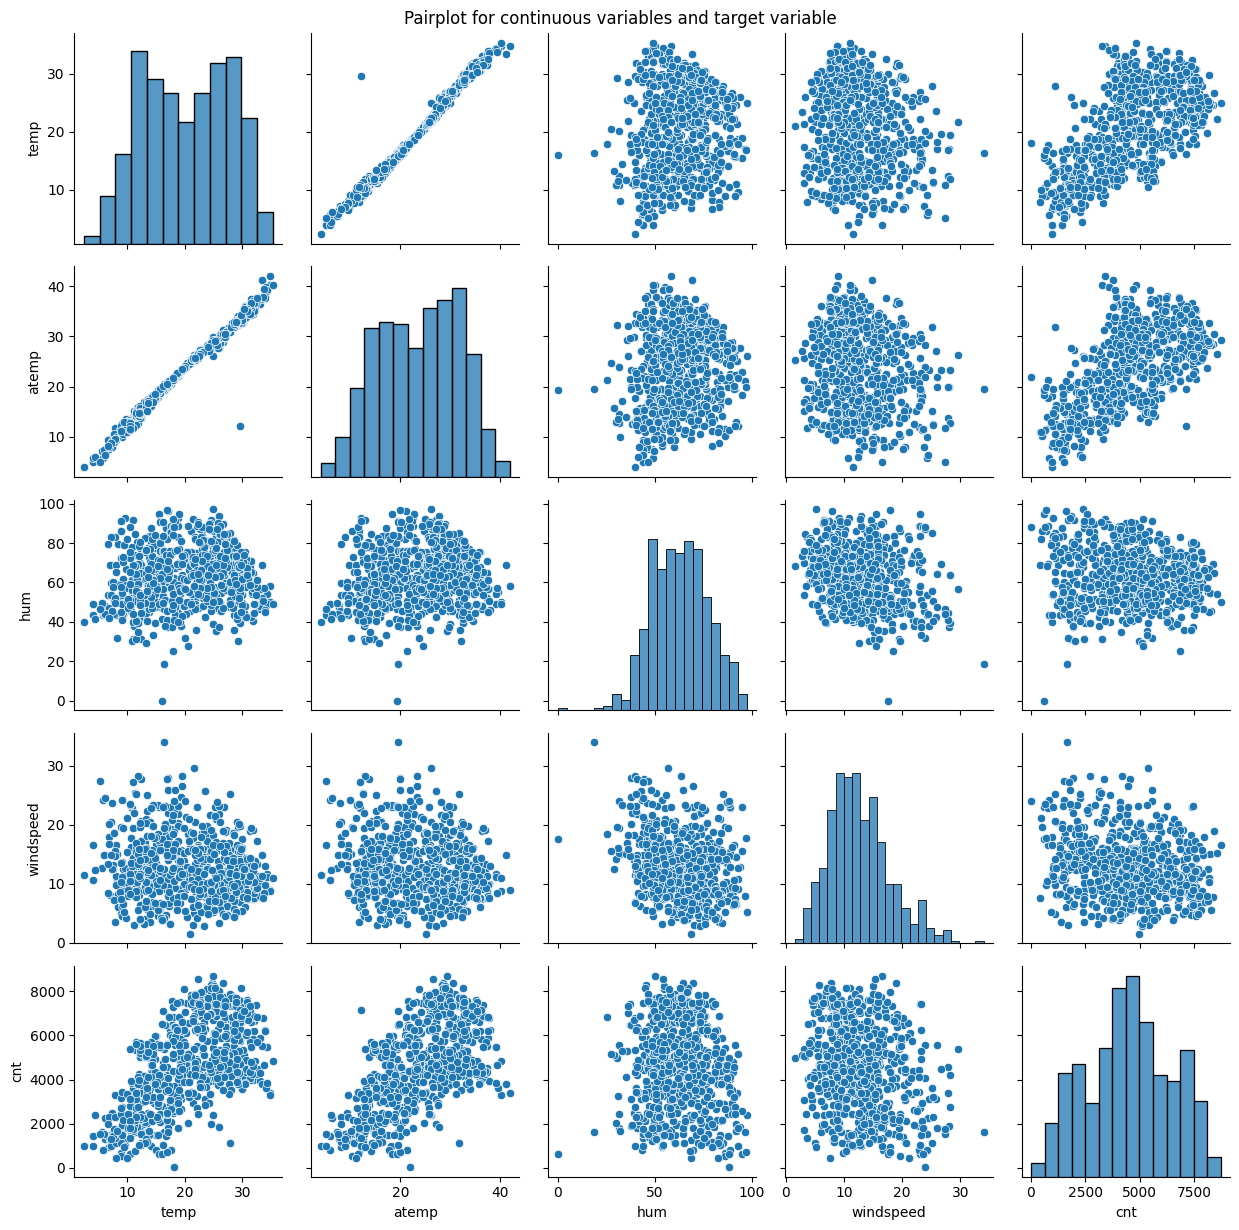

In [17]:
sns.pairplot(data=df[continuous_variables])

plt.suptitle("Pairplot for continuous variables and target variable")

plt.tight_layout()
plt.show()

- *temp* and *atemp* are highly correlated. We will need to drop one of these.



In [18]:
continuous_variables.remove('atemp')
df.drop('atemp', axis=1, inplace=True)

#### Categorical Variables

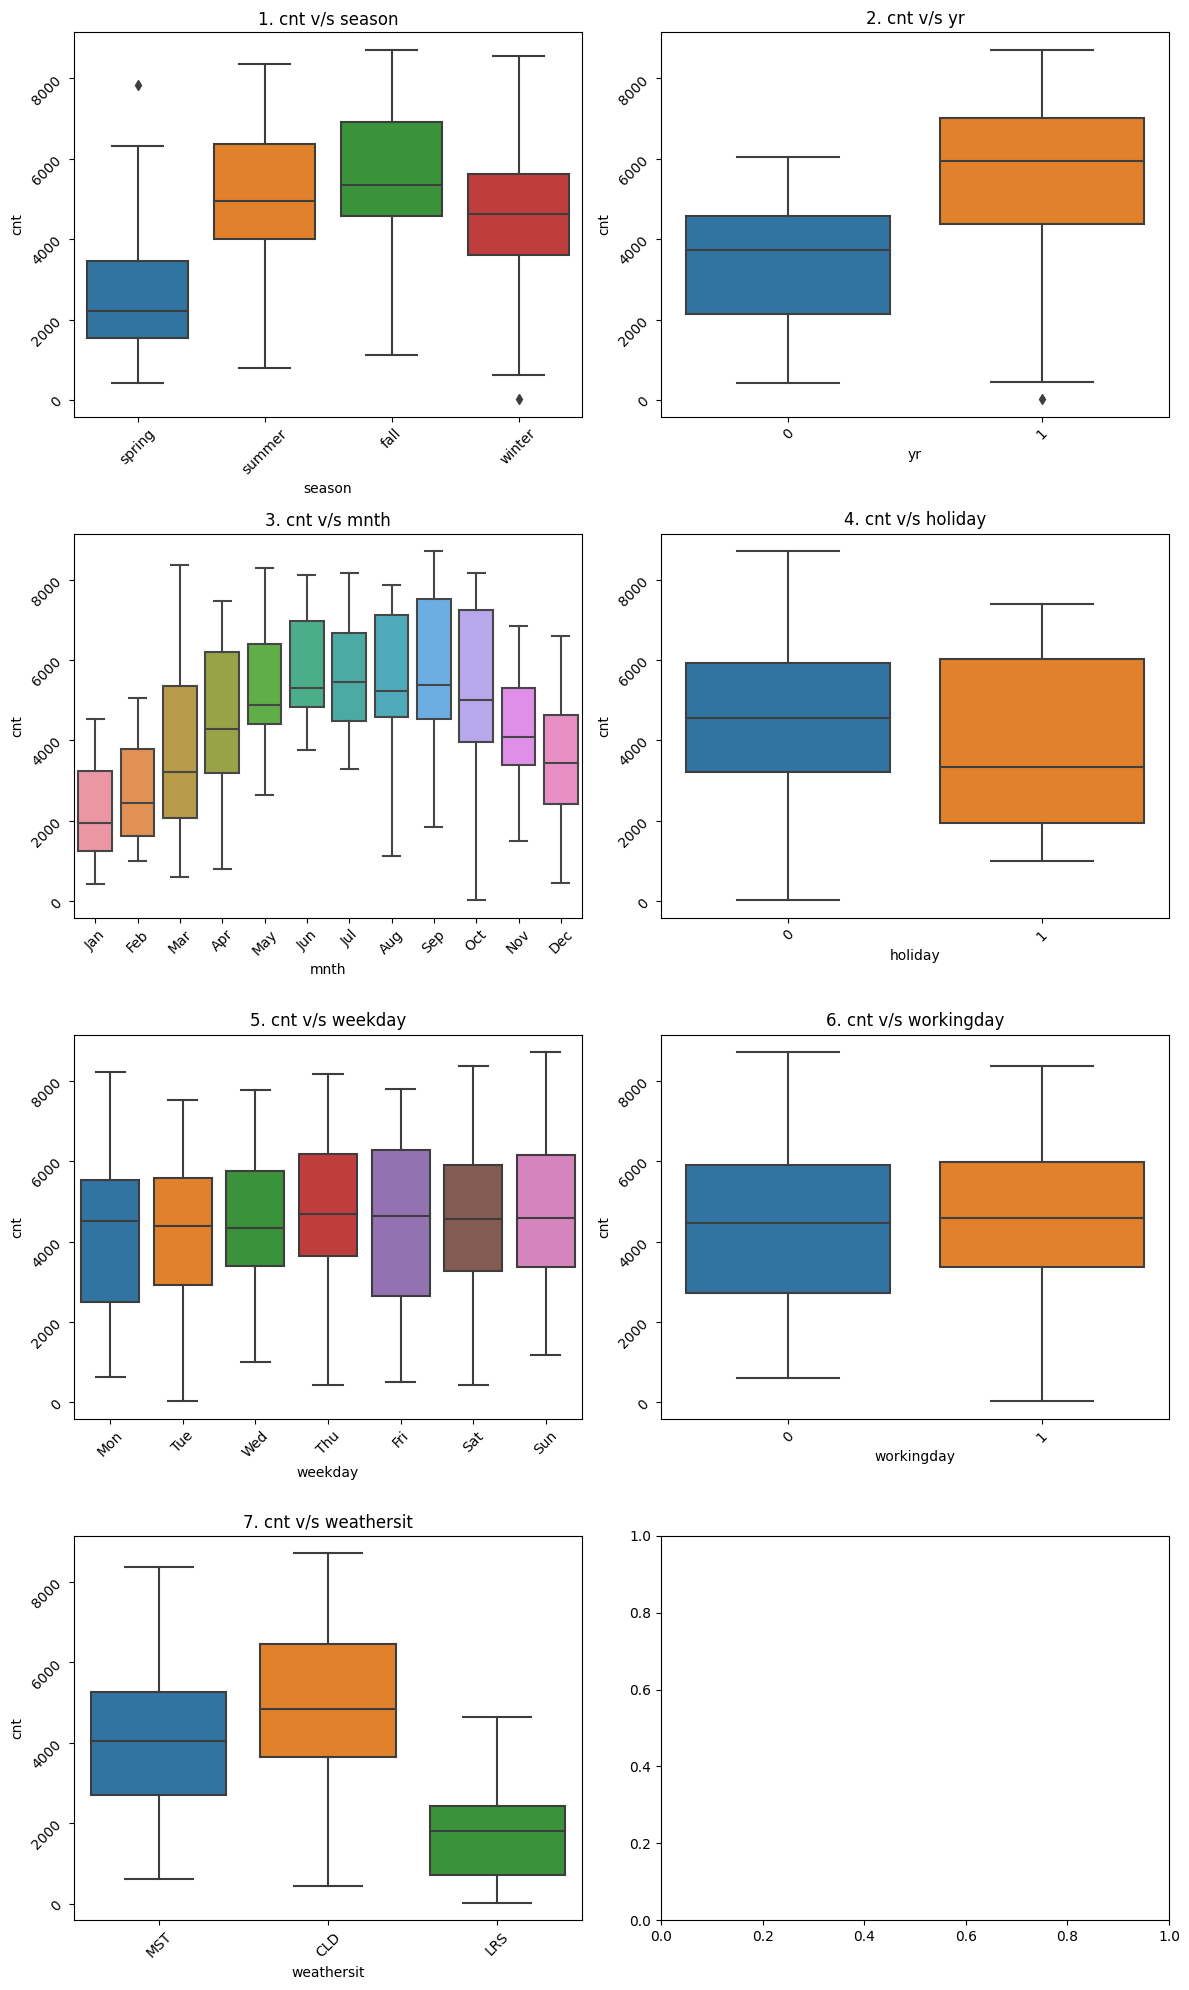

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 20)) 
subplots = axs.flatten()

for idx, col in enumerate(categorical_variables):
    ax = subplots[idx]

    sns.boxplot(data=df, x=col, y='cnt', ax=ax)

    ax.set_title(f'{idx+1}. cnt v/s {col}')
    ax.tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

### Creating Dummy Variables

*yr* has only two values i.e. 2018 and 2019. We can directly rename the column to *2019* as 1 represents 2019.

In [20]:
df.rename(columns={'yr': '2019'}, inplace=True)

season_dummies = pd.get_dummies(df['season'], drop_first=True)

mnth_dummies = pd.get_dummies(df['mnth'], drop_first=True)

weekday_dummies = pd.get_dummies(df['weekday'], drop_first=True)

weathersit_dummies = pd.get_dummies(df['weathersit'], drop_first=True)

Since we have all the dummies created we can drop the columns that we don't require anymore, and concatenate the dummies with the main dataframe.

In [21]:
df.drop(['dteday', 'season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

df = pd.concat([df, season_dummies, mnth_dummies, weekday_dummies, weathersit_dummies], axis=1)

In [22]:
df.head()

,2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LRS,MST
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Data preparation

### Train-Test Split

Spliting the train-test data into 70-30 split.

In [23]:
train_records, test_records = train_test_split(df, train_size=0.7, random_state=100)

train_records.shape, test_records.shape

((510, 29), (220, 29))

### Rescaling

We need to scale continuous variables.

In [24]:
scaler = MinMaxScaler()

train_records[continuous_variables] = scaler.fit_transform(train_records[continuous_variables])
test_records[continuous_variables] = scaler.transform(test_records[continuous_variables])

In [25]:
train_records[continuous_variables].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


Split the records into *X* and *y*.

- *X*: features
- *y*: target variable

In [26]:
y_train = train_records.pop('cnt')
X_train = train_records

In [27]:
y_test = test_records.pop('cnt')
X_test = test_records

## Step 3: Training the model

We are going to use a mixed approach to select the features. 

- Using RFE (Recursive Feature Elimination), we would be able to cut down the number of features by half.
- Then we will manually eliminate the features depending on their p-value and VIF.
    
Feature dropping preference:
1. High p-value, High VIF
2. High p-value, Low VIF
3. Low p-value, High VIF

*Note: High p-value is above 0.05 and High VIF is above 5*

### Recursive Feature Elimination

In [28]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [29]:
rfe = RFE(estimator=lm)
rfe = rfe.fit(X_train, y_train)

pd.DataFrame({
    'Feature': X_train.columns,
    'Support': rfe.support_,
    'Rank': rfe.ranking_
}).sort_values(by='Rank', ascending=False)

,Feature,Support,Rank
2,workingday,False,15
15,Mar,False,14
21,Sat,False,13
23,Thu,False,12
18,Oct,False,11
14,Jun,False,10
22,Sun,False,9
25,Wed,False,8
9,Aug,False,7
16,May,False,6


Drop the features eliminated by RFE.

In [30]:
X_train.drop(X_train.columns[~rfe.support_], axis=1, inplace=True)

### Manual Feature Elimination

We are going to need to train and summarise a couple of times, so creating a function would be easier.

In [31]:
def train_and_summarize(_X_train: pd.DataFrame) -> tuple:
    # Create and fit the model
    _X_train_sm = sm.add_constant(_X_train)

    _lr = sm.OLS(y_train, _X_train_sm)
    _model = _lr.fit()

    # Create a dataframe summary
    # Add p values first
    _summary = pd.DataFrame({
        'p_value': _model.pvalues[1:].round(3)
    })

    # Index is our feature name here
    # Reset index and use the feature name in a column
    _summary.reset_index(inplace=True)
    _summary.rename(columns={'index': 'Features'}, inplace=True)

    # Calculate VIF 
    _summary['VIF'] = _summary.apply(
        lambda x: round(vif(_X_train.values, x.name), 3),   # x.name=row index
        axis=1)

    # Sort by p_value
    _summary.sort_values(by='p_value', ascending=False, inplace=True)

    # Return the tuple of model results and summary dataframe
    return _model, _summary

In [32]:
lr_model, summary = train_and_summarize(X_train)

summary[(summary['p_value']>0.05) & (summary['VIF']>5)]

,Features,p_value,VIF


Since, we don't have any features fitting in our first criteria, we can look for the second criteria.

In [33]:
summary[summary['p_value']>0.05]

,Features,p_value,VIF
10,Nov,0.174,1.599
8,Jan,0.053,1.665


We can eliminate *Nov* and fit the model again to see if we still have the feature fitting into the second criteria.

In [34]:
X_train.drop('Nov', axis=1, inplace=True)

lr_model, summary = train_and_summarize(X_train)

summary[summary['p_value']>0.05]

,Features,p_value,VIF
8,Jan,0.059,1.665


In [35]:
X_train.drop('Jan', axis=1, inplace=True)

lr_model, summary = train_and_summarize(X_train)

summary[summary['p_value']>0.05]

,Features,p_value,VIF


We can check for the features falling into the third criteria.

In [36]:
summary[summary['VIF']>5]

,Features,p_value,VIF
2,temp,0.0,16.030
3,hum,0.0,28.027


Both *temp* and *hum* have very high VIF. We can drop *hum* first as it has higher VIF.

In [37]:
X_train.drop('hum', axis=1, inplace=True)

lr_model, summary = train_and_summarize(X_train)

summary[summary['VIF']>5]

,Features,p_value,VIF
2,temp,0.0,5.092


*temp* still has a high VIF but has negligible p value. It might be a feature worth keeping.

### Summary

In [38]:
summary

,Features,p_value,VIF
7,Jul,0.005,1.584
4,spring,0.002,2.079
5,summer,0.002,2.227
0,2019,0.000,2.067
1,holiday,0.000,1.043
2,temp,0.000,5.092
3,windspeed,0.000,4.601
6,winter,0.000,1.780
8,Sep,0.000,1.337
9,LRS,0.000,1.081


We have the list of the 11 selected features.

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          5.06e-187
Time:                        06:25:56   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
2019           0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer         0.0465      0.015      3.051      0.002       0.017       0.076
winter         0.0817      0.017      4.730      0.000       0.048       0.116
Jul           -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep            0.0768      0.017      4.517      0.000       0.043       0.110
LRS           -0.2842      0.025    -11.487      0.000      -0.333      -0.236
MST           -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 4: Residual analysis 

Predict the *y* values for the train set.

In [40]:
X_train_sm = sm.add_constant(X_train)
y_train_predict = lr_model.predict(X_train_sm)

Calculate the residuals

In [41]:
residuals = y_train - y_train_predict

Plot a density plot for the residuals.

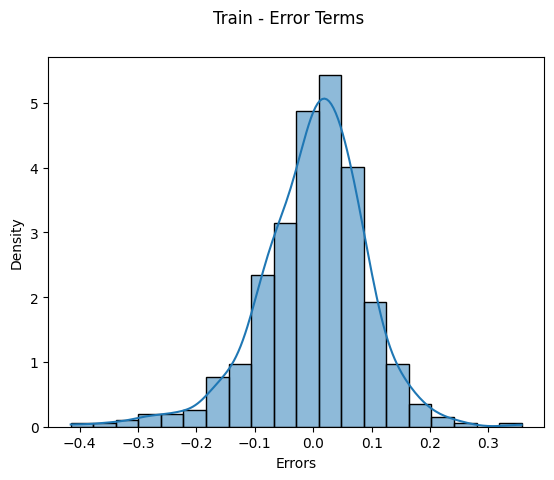

In [42]:
sns.histplot(residuals, stat='density', kde=True, bins=20)

plt.suptitle('Train - Error Terms')
plt.xlabel('Errors')

plt.show()

## Step 5: Predictions and model evaluation 

Drop the features that are not in our model.

In [43]:
X_test = X_test[X_train.columns]

Predict the *y* values on the test set.

In [44]:
X_test_sm = sm.add_constant(X_test)
y_test_predict = lr_model.predict(X_test_sm)

Plot a scatter plot for actual vs predicted y values.

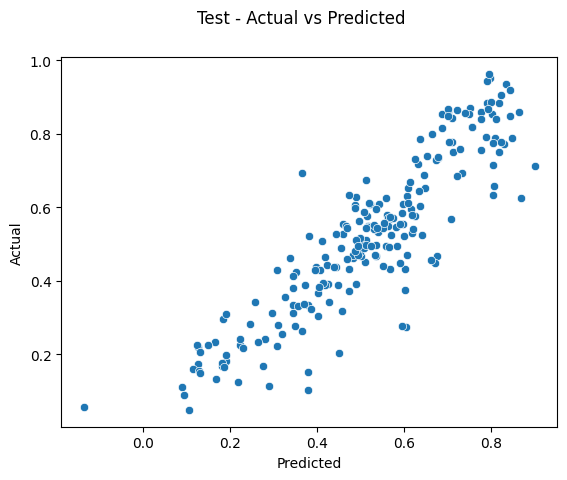

In [45]:
sns.scatterplot(x=y_test_predict, y=y_test)

plt.suptitle('Test - Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

Calculate R-Squared

In [46]:
r2 = r2_score(y_test, y_test_predict)

round(r2, 3)

0.805

Calculate Adjusted R-Squared

In [47]:
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

round(adj_r2, 3)

0.795

Since, our R-squared and Adjusted R-squared are in the range ±5% with the model's metrics, we can say that our model does not overfit.

## Model Summary

We have selected 11 features for our model, and following are the results and metrics.

|  | Train Set | Test Set |
| --- | --- | --- |
| R-Squared | 0.835 | 0.805 |
| Adj. R-Squared | 0.832 | 0.795 |
| F-statistic | 229.6 | N.A. |


In [48]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          5.06e-187
Time:                        06:25:57   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
2019           0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer         0.0465      0.015      3.051      0.002       0.017       0.076
winter         0.0817      0.017      4.730      0.000       0.048       0.116
Jul           -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep            0.0768      0.017      4.517      0.000       0.043       0.110
LRS           -0.2842      0.025    -11.487      0.000      -0.333      -0.236
MST           -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""